# Currency Analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
## pound-dollar data
dollar = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\pounddollarDATA.csv",skiprows=13,index_col=0)
dollar.index = pd.to_datetime(dollar.index)
dollar.columns = [c.replace(' ', '') for c in dollar.columns] ## to remove the hidden space in the value column ##
dollar.head()

,value
date,
1971-01-04,2.39
1971-01-05,2.39
1971-01-06,2.40
1971-01-07,2.40
1971-01-08,2.40


In [24]:
gold = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\goldDATA.csv",index_col=0)
gold.index = pd.to_datetime(gold.index)
gold.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-06,1712.9,202021.0,1724.2,1737.4,1710.6
2022-09-02,1722.6,171140.0,1707.8,1729.5,1705.9
2022-09-01,1709.3,192532.0,1723.0,1723.0,1699.1
2022-08-31,1726.2,169549.0,1735.5,1738.0,1720.6
2022-08-30,1736.3,126018.0,1749.8,1752.8,1732.9


In [25]:
## last value from every month ##
dollar.groupby(dollar.index.strftime('%Y-%m')).tail(1)

,value
date,
1971-01-29,2.4200
1971-02-26,2.4200
1971-03-31,2.4200
1971-04-30,2.4200
1971-05-28,2.4200
...,...
2022-05-31,1.2609
2022-06-30,1.2167
2022-07-30,1.2175


In [26]:
##filtering the dollar-pound data to allign with the gold data ##

dollar_filt = dollar.groupby(dollar.index.strftime('%Y-%m')).tail(1).last("11Y").sort_values(by="date", ascending=False)[0:121]

## adding a column to see price of GBP for 1 USD ##

value_inverse = 1/(dollar_filt)
dollar_filt["value_inverse"] = value_inverse

In [27]:
gold_filt = gold.groupby(gold.index.strftime('%Y-%m')).tail(1).Open

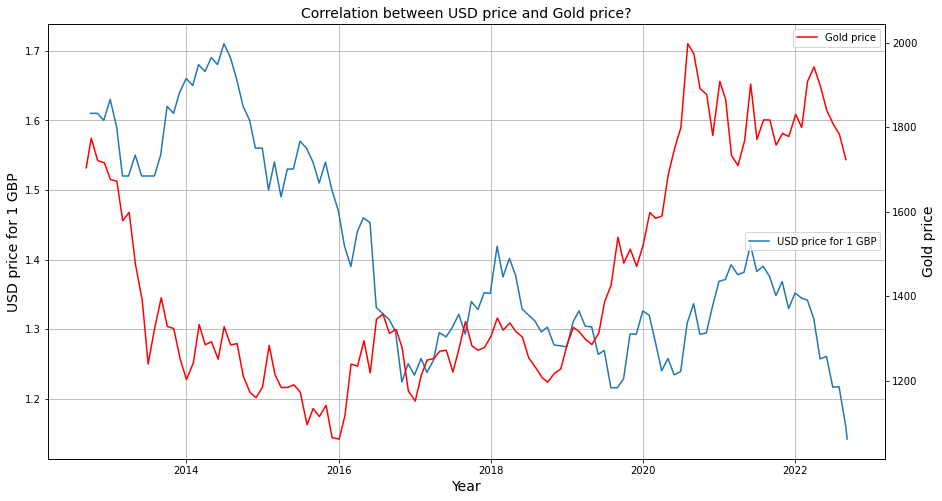

In [28]:
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title("Correlation between USD price and Gold price?", fontsize=14)
ax.plot(dollar_filt.value,label="USD price for 1 GBP")
ax.grid(True)
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("USD price for 1 GBP", fontsize=14)
ax.legend(loc="right")
ax2=ax.twinx()
ax2.plot(gold_filt, color="Red",label="Gold price")
ax2.set_ylabel("Gold price", fontsize=14)
ax2.legend();

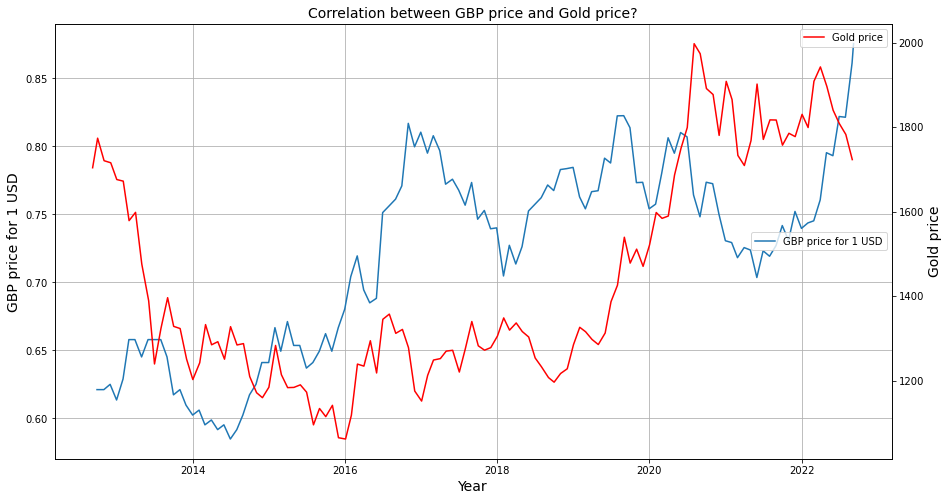

In [29]:
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title("Correlation between GBP price and Gold price?", fontsize=14)
ax.plot(dollar_filt.value_inverse,label="GBP price for 1 USD")
ax.grid(True)
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("GBP price for 1 USD", fontsize=14)
ax.legend(loc="right")
ax2=ax.twinx()
ax2.plot(gold_filt, color="Red",label="Gold price")
ax2.set_ylabel("Gold price", fontsize=14)
ax2.legend();

The correlation R-value is 0.26293981892845175


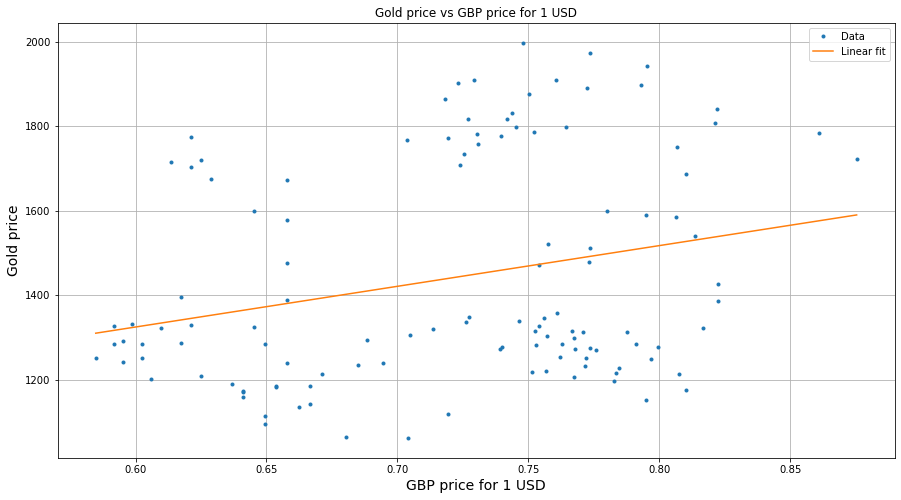

In [30]:
from scipy.stats import linregress

slope = linregress(dollar_filt.value_inverse, gold_filt).slope
c = linregress(dollar_filt.value_inverse, gold_filt).intercept
rvalue = linregress(dollar_filt.value_inverse, gold_filt).rvalue
x = np.linspace(np.min(dollar_filt.value_inverse),np.max(dollar_filt.value_inverse),100)

plt.figure(figsize=(15,8))
plt.plot(dollar_filt.value_inverse, gold_filt,".", label="Data")
plt.plot(x, slope*x + c, label="Linear fit")
plt.grid(True)
plt.xlabel("GBP price for 1 USD", fontsize=14)
plt.ylabel("Gold price", fontsize=14)
plt.title("Gold price vs GBP price for 1 USD")
plt.legend();

print("The correlation R-value is", rvalue)

**OIL DATA (EUROPE BRENT SPOT PRICE FOB)**

In [31]:
brent_spot = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\EU_brent_spot.csv",skiprows=4,index_col=0)
## creating a shorter column name ##
brent_spot.rename(columns={'Europe Brent Spot Price FOB  Dollars per Barrel': 'dollars_per_barrel'}, inplace=True)
## ensuring the index is recognised as time entry ##
brent_spot.index = pd.to_datetime(brent_spot.index)

In [32]:
brent_spot_filt = brent_spot.groupby(brent_spot.index.strftime('%Y-%m')).tail(1).sort_values(by="Day", ascending=True).last("20Y")

## dates need to be in ascending order for .last() to work ##

## slightly changing the original dollar_filt to allign with the new data ##

dollar_filt = dollar.groupby(dollar.index.strftime('%Y-%m')).tail(1).last("20Y").sort_values(by="date", ascending=True)
value_inverse = 1/(dollar_filt)
dollar_filt["value_inverse"] = value_inverse

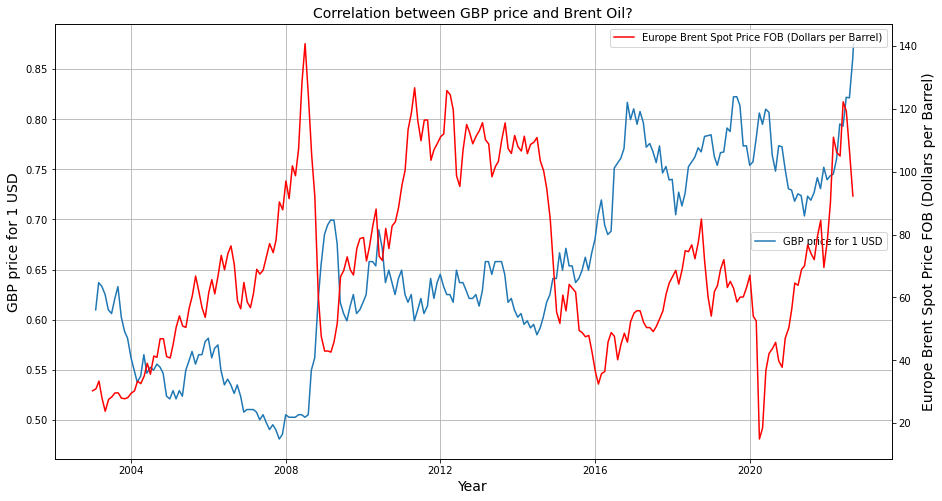

In [33]:
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title("Correlation between GBP price and Brent Oil?", fontsize=14)
ax.plot(dollar_filt.value_inverse,label="GBP price for 1 USD")
ax.grid(True)
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("GBP price for 1 USD", fontsize=14)
ax.legend(loc="right")
ax2=ax.twinx()
ax2.plot(brent_spot_filt, color="Red",label="Europe Brent Spot Price FOB (Dollars per Barrel)")
ax2.set_ylabel("Europe Brent Spot Price FOB (Dollars per Barrel)", fontsize=14)
ax2.legend();

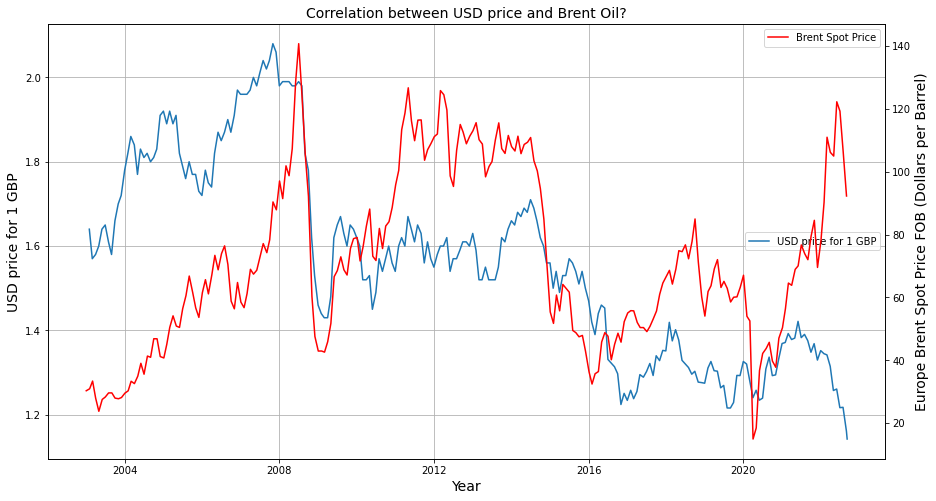

In [34]:
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title("Correlation between USD price and Brent Oil?", fontsize=14)
ax.plot(dollar_filt.value,label="USD price for 1 GBP")
ax.grid(True)
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("USD price for 1 GBP", fontsize=14)
ax.legend(loc="right")
ax2=ax.twinx()
ax2.plot(brent_spot_filt, color="Red",label="Brent Spot Price")
ax2.set_ylabel("Europe Brent Spot Price FOB (Dollars per Barrel)", fontsize=14)
ax2.legend();

The correlation R-value is -0.13387740728903136


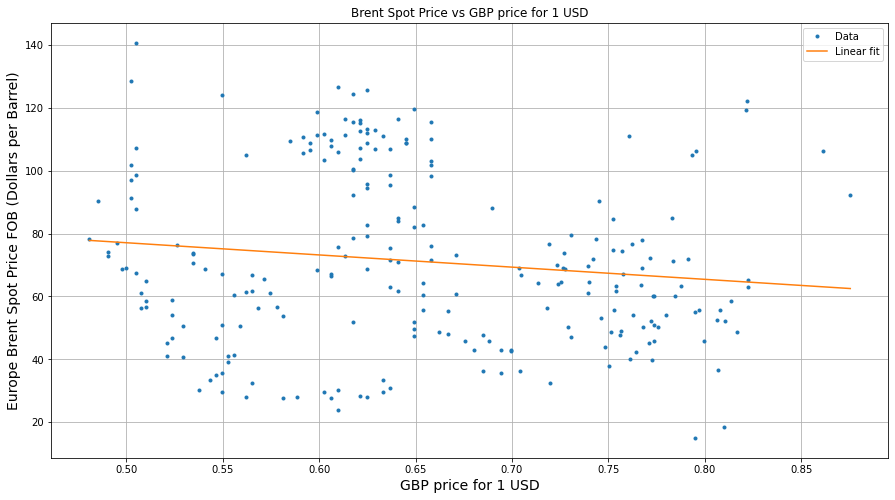

In [35]:
slope = linregress(dollar_filt.value_inverse, brent_spot_filt.dollars_per_barrel).slope
c = linregress(dollar_filt.value_inverse, brent_spot_filt.dollars_per_barrel).intercept
rvalue = linregress(dollar_filt.value_inverse, brent_spot_filt.dollars_per_barrel).rvalue
x = np.linspace(np.min(dollar_filt.value_inverse),np.max(dollar_filt.value_inverse),100)

plt.figure(figsize=(15,8))
plt.plot(dollar_filt.value_inverse, brent_spot_filt.dollars_per_barrel,".", label="Data")
plt.plot(x, slope*x + c, label="Linear fit")
plt.grid(True)
plt.xlabel("GBP price for 1 USD", fontsize=14)
plt.ylabel("Europe Brent Spot Price FOB (Dollars per Barrel)", fontsize=14)
plt.title("Brent Spot Price vs GBP price for 1 USD")
plt.legend();

print("The correlation R-value is", rvalue)

The correlation R-value is 0.11821404745609816


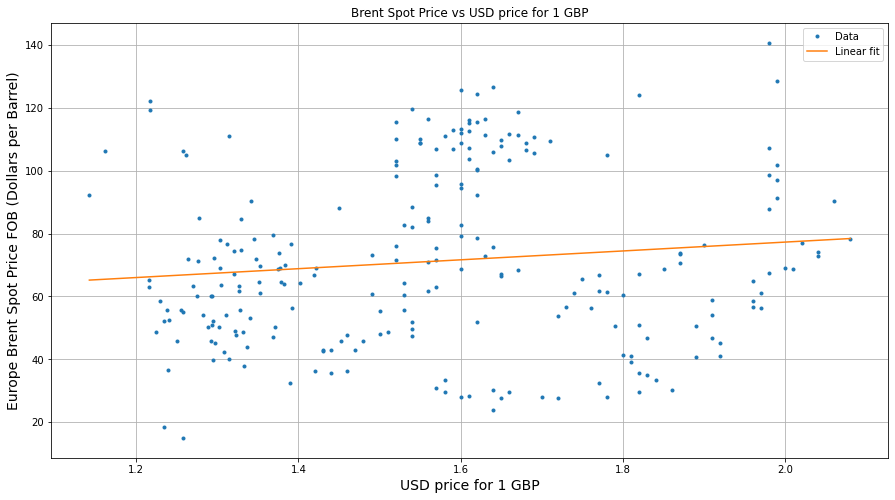

In [36]:
slope = linregress(dollar_filt.value, brent_spot_filt.dollars_per_barrel).slope
c = linregress(dollar_filt.value, brent_spot_filt.dollars_per_barrel).intercept
rvalue = linregress(dollar_filt.value, brent_spot_filt.dollars_per_barrel).rvalue
x = np.linspace(np.min(dollar_filt.value),np.max(dollar_filt.value),100)

plt.figure(figsize=(15,8))
plt.plot(dollar_filt.value, brent_spot_filt.dollars_per_barrel,".", label="Data")
plt.plot(x, slope*x + c, label="Linear fit")
plt.grid(True)
plt.xlabel("USD price for 1 GBP", fontsize=14)
plt.ylabel("Europe Brent Spot Price FOB (Dollars per Barrel)", fontsize=14)
plt.title("Brent Spot Price vs USD price for 1 GBP")
plt.legend();

print("The correlation R-value is", rvalue)